In [1]:
import pandas as pd
import numpy as np
import pandas_ta as ta
import legendary_ta as lta
import custom_indicator as cta

In [3]:
df = pd.read_pickle("./data/binance-BTCUSDT-1h.pkl")


In [4]:
df = df.loc['2023-01-01 02:00:00':'2023-01-15 02:00:00']

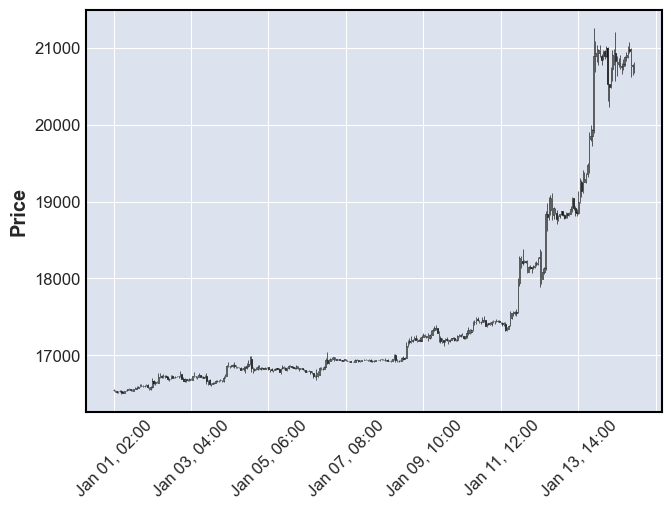

In [5]:
import mplfinance as mpf
mpf.plot(df, type='candle')